# Quantum Circuit Expressibility 

Quantum Circuit Expressibility $\epsilon_{\mathbb{U}}^{(t,p)}(X)$ is defined by

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(t,p)}(X) &:= \|A_{\mathbb{U}}^{(t)}(X)\|_p\\
    \mathcal{A}_{\mathbb{U}}^{(t)}(X) &:= \int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes t}X^{\otimes t}(V^\dagger)^{\otimes t} - \int_{U\in\mathbb{U}} dU\,U^{\otimes t}X^{\otimes t}(U^\dagger)^{\otimes t}
\end{aligned}


, where $\|\cdot\|_p$ is Schatten $p$-norm, $X$ is either an initial state or an observable, $\mathcal{U}$ is the unitary group of $d$-dimensional Hilbert space, and $\mathbb{U}$ is a subset of $\mathcal{U}$ accessible by the circuit.

Since we are interested in whether the circuit of interest forms quantum 2-design, we will only consider the case of $t=2$.

---
For $\epsilon_{\mathbb{U}}^{(2,2)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_2$, the expressibility is redefined by frame potential as follows:

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(2,2)}(X) &:= \sqrt{\mathcal{F}_{\mathbb{U}}^{(2)}(X) - \mathcal{F}_{Haar}^{(2)}(X) }\\
    \mathcal{F}_{\mathbb{U}}^{(2)}(X) &:= \int_{W\in\mathbb{U}}\int_{V\in\mathbb{U}} dWdV \operatorname{Tr}[XW^\dagger VX^\dagger V^\dagger W]^2,\\
    \mathcal{F}_{\mathrm{Haar}}^{(2)}(X) &:= \int_{W\in\mathcal{U}}\int_{V\in\mathcal{U}} d\mu_{\mathrm{Haar}}(W)d\mu_{\mathrm{Haar}}(V) \operatorname{Tr}[XW^\dagger VX^\dagger V^\dagger W]^2.
\end{aligned}

We use an initial state $|0\rangle\langle0|$ as $X$, then,
\begin{aligned}
    (\epsilon_{\mathbb{U}}^{(2,2)}(|0\rangle\langle0|))^2 = \int_{W\in\mathbb{U}}\int_{V\in\mathbb{U}} dWdV |\langle0|W^\dagger V|0\rangle|^4 - \frac{1}{2^{n-1}(2^n + 1)}
\end{aligned}

## 1. Estimate the expressibility with Schatten 2-norm: $\epsilon_{\mathbb{U}}^{(2,2)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from src.expressibility_pennylane import *
from src.do_all_expressibility2norm_pennylane import *

In [2]:
# set parameters
circuit_types = ['TPA', 'HEA', 'ALT']
nqubits_list = np.arange(2, 7)
nlayers_list = [1,2,3,4,5,6]
nsamples = 10**3

In [9]:
# exp2_all = do_all_pennylane(circuit_types, nqubits_list, nlayers_list, nsamples)
# _ = exp2_all.frame_potential_samples_each_circuit_type_()
# _ = exp2_all.frame_potential_analytical_samples_each_nqubits_()

In [14]:
# # save data
# l = exp2_all.frame_potential_analytical_samples_each_nqubits, exp2_all.frame_potential_samples_each_circuit_type
# path = "../results/data/exp2_all_pennylane.pkl"

# with open(path, "wb") as f:
#     pickle.dump(l, f)

In [3]:
# load data
path = "../results/data/exp2_all_pennylane.pkl"

with open(path, "rb") as f:
    exp2_all = do_all_pennylane(circuit_types, nqubits_list, nlayers_list, nsamples)
    exp2_all.frame_potential_analytical_samples_each_nqubits, exp2_all.frame_potential_samples_each_circuit_type = pickle.load(f)

### 1.1. TPA

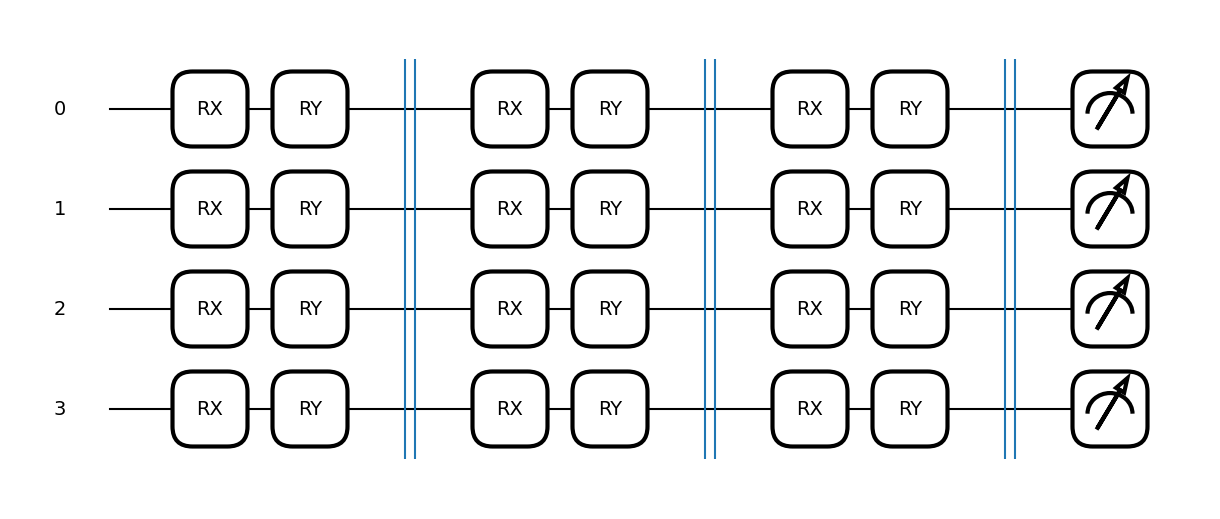

In [6]:
# show circuit
nqubits = 4
nlayers = 3
exp = GenerateCircuit_pennylane('TPA', nqubits, nlayers)
exp.draw_circuit(nqubits, nlayers)

[1, 2, 3, 4, 5, 6]


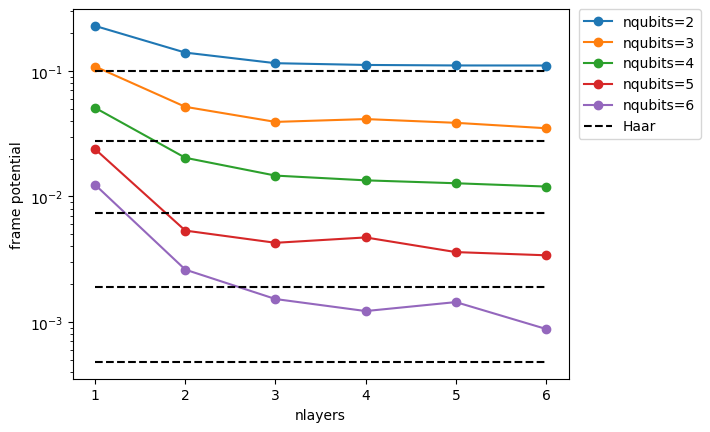

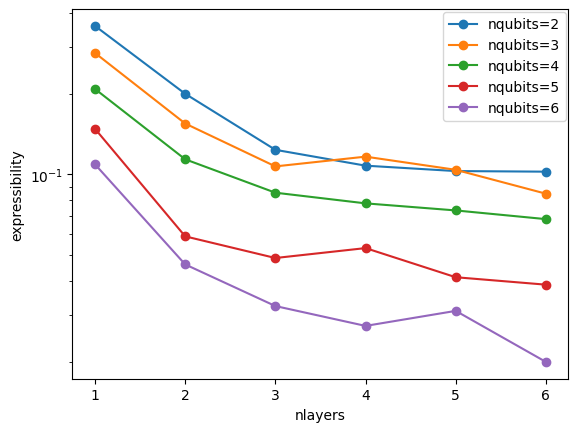

In [4]:
exp2_all.plot_all('TPA')

### 1.2. ALT

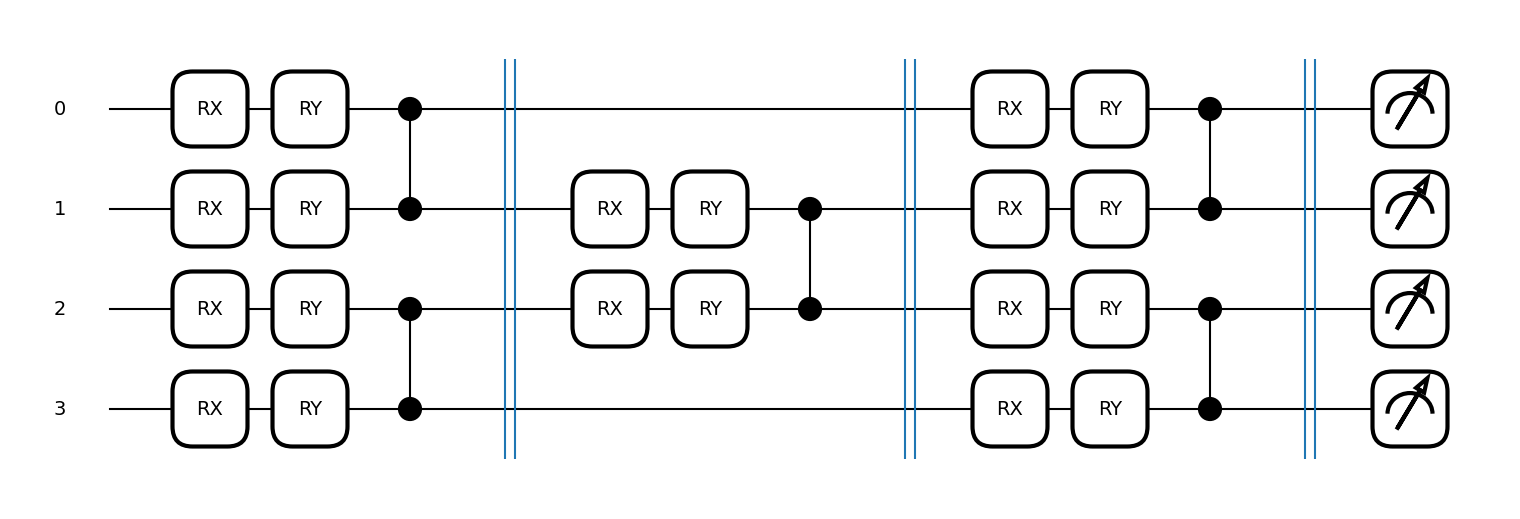

In [3]:
# show circuit
nqubits = 4
nlayers = 3
exp = GenerateCircuit_pennylane('ALT', nqubits, nlayers)
exp.draw_circuit(nqubits, nlayers)

[1, 2, 3, 4, 5, 6]


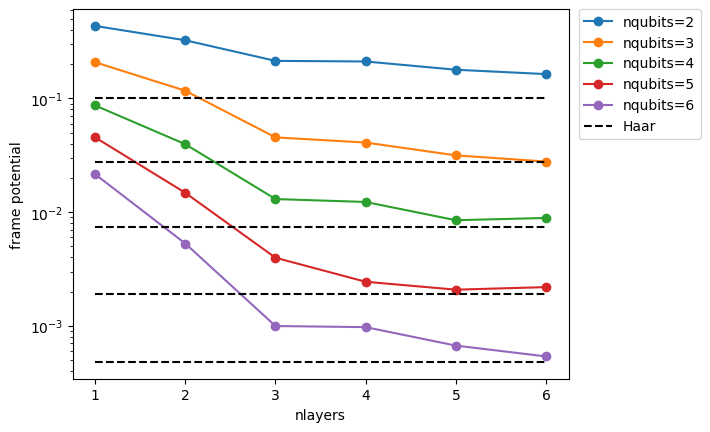

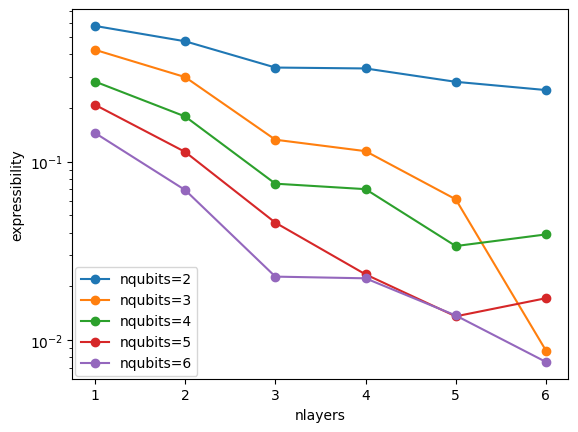

In [12]:
exp2_all.plot_all('ALT')

### 1.3. HEA

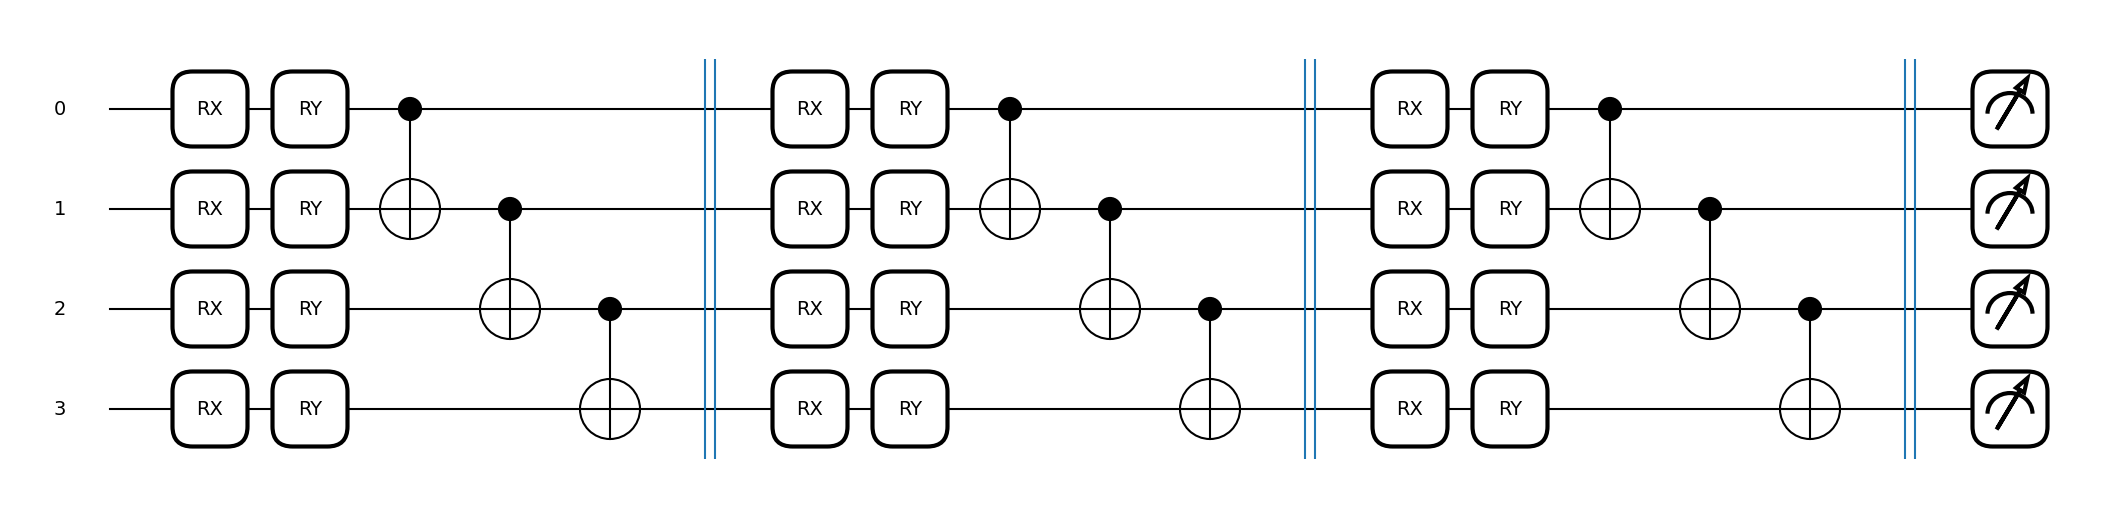

In [4]:
# show circuit
nqubits = 4
nlayers = 3
exp = GenerateCircuit_pennylane('HEA', nqubits, nlayers)
exp.draw_circuit(nqubits, nlayers)

[1, 2, 3, 4, 5, 6]


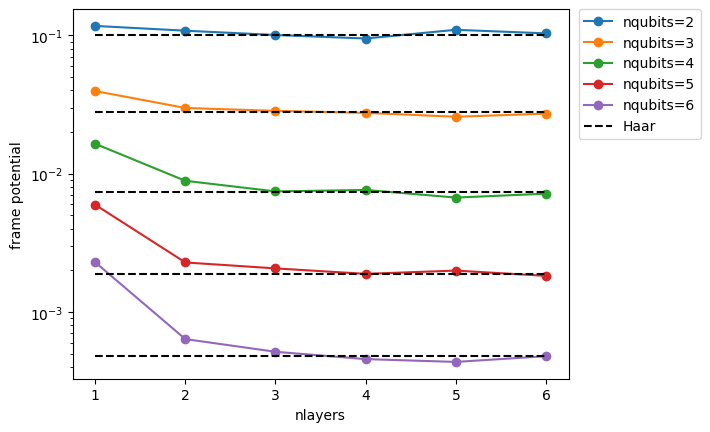

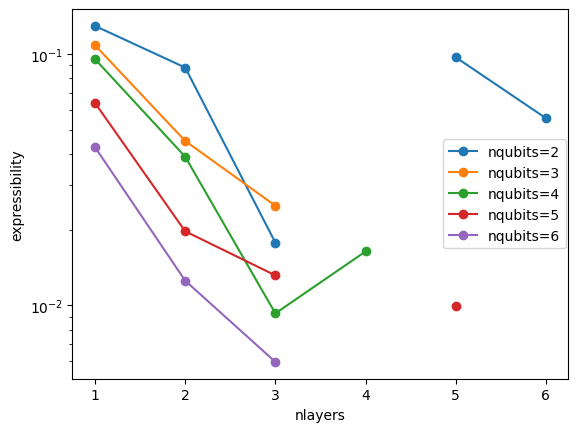

In [13]:
exp2_all.plot_all('HEA')

#### Because the circuit frame potential converges to the analytical haar frame potential so quickly as the number of layers increases, it seems difficult to estimate the expressibility, which is defined by $\sqrt{\mathcal{F}_{\mathbb{U}}^{(2)}(X) - \mathcal{F}_{Haar}^{(2)}(X) }$, for more than several layers.

## 2. Estimate the expressibility with Schatten 1-norm: $\epsilon_{\mathbb{U}}^{(2,1)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_1$

#### $\epsilon_{\mathbb{U}}^{(2,1)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_1 = \operatorname{Tr}|\int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes 2}X^{\otimes 2}(V^\dagger)^{\otimes 2} - \int_{U\in\mathbb{U}} dU\,U^{\otimes 2}X^{\otimes 2}(U^\dagger)^{\otimes 2}|$

#### The first term in the trace is estimated as follows: $ \int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes 2}X^{\otimes 2}(V^\dagger)^{\otimes 2} = (\mathbb{I}_{d^2} + F)/d(d+1)$, where $F$ is SWAP: $ \sum_{i,j=1}^d |ij\rangle\langle ji|$ and $X=|0\rangle\langle0|^{\otimes n}$

ref: http://arxiv.org/abs/1408.3782 Eq. (3.27)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from src.expressibility_pennylane import *

In [22]:
nqubits = 2
nlayers_list = [1,5,10,20]
nsamples_list = [10,100,1000]

In [23]:
expressibility_1norm_samples_each_nsamples = []
for nsamples in nsamples_list:
    expressibility_1norm_samples_each_nlayers = []
    for nlayers in nlayers_list:
        exp = Expressibility1norm_pennylane('HEA', nqubits, nlayers, nsamples)
        expressibility_1norm_samples_each_nlayers.append(exp.expressibility())
    expressibility_1norm_samples_each_nsamples.append(expressibility_1norm_samples_each_nlayers)

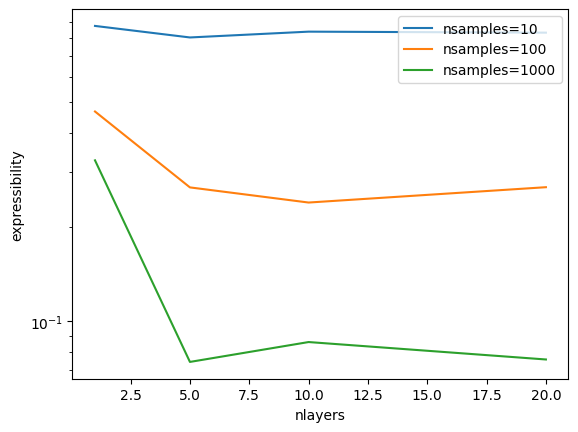

In [24]:
for i in range(len(nsamples_list)):
    plt.semilogy(nlayers_list, expressibility_1norm_samples_each_nsamples[i], label=f'nsamples={nsamples_list[i]}')
plt.xlabel('nlayers')
plt.ylabel('expressibility')
plt.legend()
plt.show()

### The expressibility should converge to 0 as the number of layers increases, but it seems there exists a limit to estimate the expressibility for each number of samples.

In [29]:
circuit_types = ['HEA']
nqubits_list = np.arange(2, 5)
nlayers_list = [1,2,3,4,5,6]
nsamples = 10**3

In [30]:
expressibility_1norm_samples_each_circuit_type = []
for circuit_type in circuit_types:
    expressibility_1norm_samples_each_nqubits = []
    for nqubits in nqubits_list:
        expressibility_1norm_samples_each_nlayers = []
        for nlayers in nlayers_list:
            exp = Expressibility1norm_pennylane(circuit_type, nqubits, nlayers, nsamples)
            expressibility_1norm_samples_each_nlayers.append(exp.expressibility())
        expressibility_1norm_samples_each_nqubits.append(expressibility_1norm_samples_each_nlayers)
expressibility_1norm_samples_each_circuit_type.append(expressibility_1norm_samples_each_nqubits)

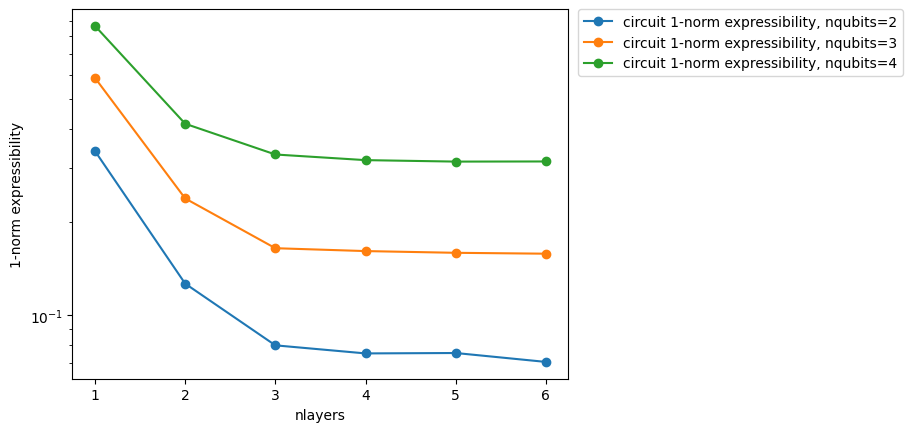

In [31]:
for i in range(len(nqubits_list)):
    plt.semilogy(nlayers_list, expressibility_1norm_samples_each_circuit_type[0][i], label=f'circuit 1-norm expressibility, nqubits={nqubits_list[i]}', marker='o')

plt.xlabel('nlayers')
plt.ylabel('1-norm expressibility')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()